In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mtcnn = MTCNN(image_size=240, margin=0, min_face_size=20)  
resnet = InceptionResnetV1(pretrained='vggface2').eval()  

dataset=datasets.ImageFolder('anh lung tung')  
idx_to_class = {i:c for c,i in dataset.class_to_idx.items()} 

def collate_fn(x):
    return x[0]

loader = DataLoader(dataset, collate_fn=collate_fn)

face_list = []  
name_list = []  
embedding_list = []  

#Lay dl
for img, idx in loader:
    face, prob = mtcnn(img, return_prob=True) 
    if face is not None and prob>0.90:  
        face_list.append(face)
        name_list.append(idx_to_class[idx]) 
#Chia bo test
(trainX, testX, trainY, testY) = train_test_split(face_list,
	name_list, test_size=0.3, stratify=name_list, random_state=42)    
 #train bo train
for face in trainX:
    emb = resnet(face.unsqueeze(0))   
    embedding_list.append(emb.detach().numpy()[0]) 
data = [embedding_list, name_list] 
df = pd.DataFrame(embedding_list)

C:\Users\ththo\AppData\Roaming\Python\Python39\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


        0         1         2         3         4         5         6    \
0  0.023140  0.024648 -0.051174  0.051144  0.029356 -0.048611 -0.022625   
1  0.012997  0.024410 -0.045036  0.049684  0.049588 -0.053935 -0.027992   

        7         8         9    ...       502       503       504       505  \
0  0.006503  0.033507  0.007021  ... -0.040959 -0.052970 -0.097774  0.089281   
1  0.014110  0.033364  0.004419  ... -0.045422 -0.065089 -0.095705  0.090547   

        506       507       508       509       510       511  
0 -0.000949  0.031583 -0.021945 -0.065354  0.061943  0.014904  
1  0.010287  0.021719 -0.014345 -0.056718  0.079957  0.015547  

[2 rows x 512 columns]
y=
[1. 1.]


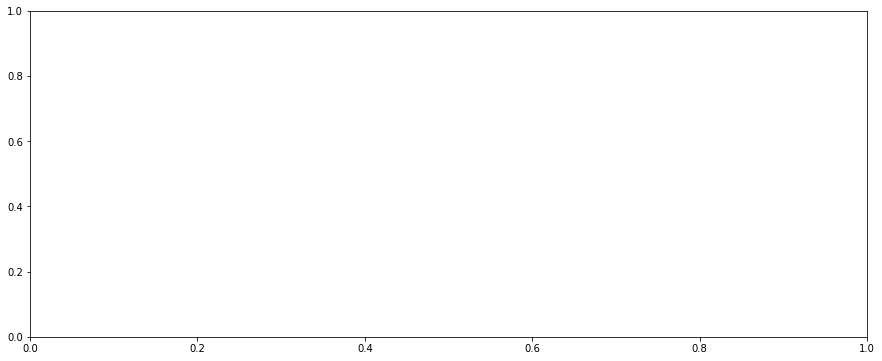

In [8]:
# Create the dataframe 
print(df)
data_scaled = df.copy()

# scaler = StandardScaler()
# scaler.fit(data_scaled)
# data_scaled = pd.DataFrame(scaler.transform(data_scaled), columns=data_scaled.columns)

pca = PCA().fit(data_scaled)
num_features = data_scaled.shape[1]
plt.rcParams["figure.figsize"] = (15, 6)

fig, ax = plt.subplots()
xi = np.arange(1, num_features + 1, step=1) 
y = np.cumsum(pca.explained_variance_ratio_)  
print("y=")
print(y)